# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds, init_pose)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

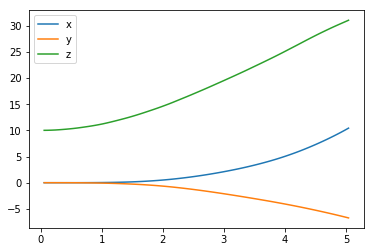

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

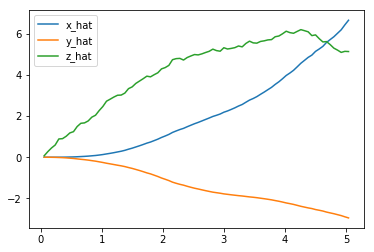

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

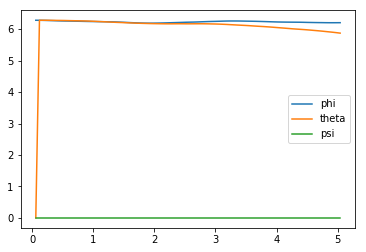

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

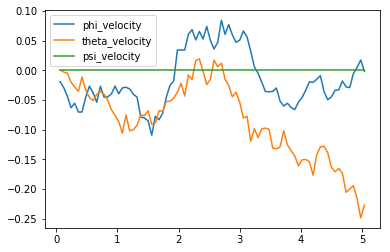

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

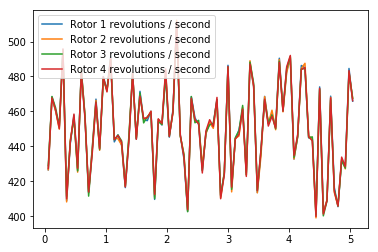

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 10.42159997  -6.72630055  31.02898366   6.20550911   5.87353875   0.        ]
[ 6.64370457 -2.94237486  5.12582184]
[-0.00171076 -0.22707483  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 20.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = PolicySearch_Agent(task) 
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act(state)
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

Using TensorFlow backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =  800, Average Reward =   0.051

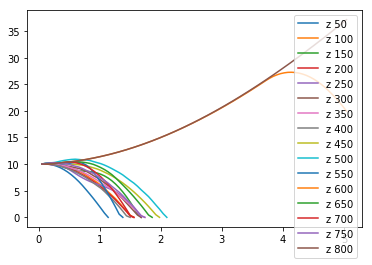

In [9]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import csv
import numpy as np
%load_ext autoreload
%autoreload 2

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results


num_episodes = 800
target_pos = np.array([0., 0., 150.])
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task) 
done = False

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward', 'reward_pose', 'reward_angularv', 'reward_pose2', 'reward_rs']

results_all = []
all_rewards = []
#rewards = []
runtimes = []


# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        results = {x : [] for x in labels}
        average_rewards_this_episode = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
        #average_reward_this_episode = 0.0
        count = 1
        
        
        while True:
            rotor_speeds = agent.act(state) 
            next_state, rewards, done = task.step(rotor_speeds, init_pose)
            agent.step(rotor_speeds, rewards, next_state, done)
            state = next_state
            average_rewards_this_episode += rewards
            #average_reward_this_episode += reward
            count += 1
            
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds) + rewards.tolist()  
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            
            
            if done:
                print("\rEpisode = {:4d}, Average Reward = {:7.3f}".format(
                    i_episode, average_rewards_this_episode[0] / count), end="")  # [debug]
                
                graph_frequency = 50
                if i_episode%graph_frequency == 0:
                    plt.figure(1)
                    plt.plot(results['time'], results['z'], label='z ' + str(i_episode))
                    plt.legend()
                     
                break
        
        runtimes.append(float(count))
        
        #r =  average_reward_this_episode / count
        r =  average_rewards_this_episode / count
        
        #rewards.append(r)
        all_rewards.append(r)
        
        results_all.append(results)
        sys.stdout.flush()  
            

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

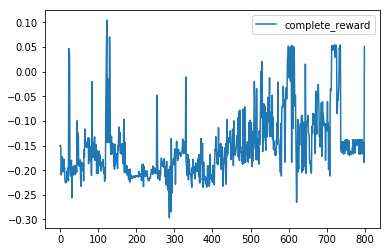

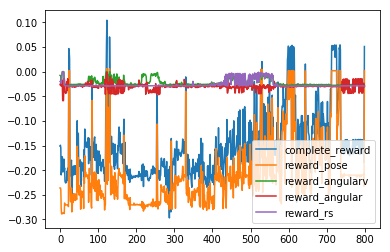

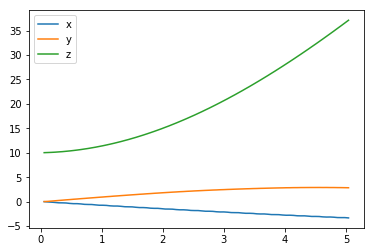

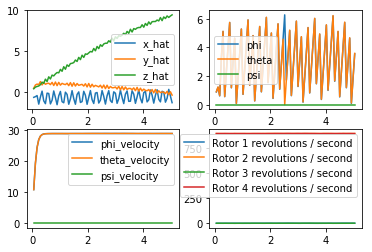

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

episodes = [i for i in range(0,len(runtimes))]

plt.figure(1)
plt.plot(episodes, [all_rewards[i][0] for i in range(0,len(all_rewards))] , label='complete_reward')
plt.legend()
_ = plt.ylim()


plt.figure(2)
plt.plot(episodes, [all_rewards[i][0] for i in range(0,len(all_rewards))] , label='complete_reward')
plt.plot(episodes, [all_rewards[i][1] for i in range(0,len(all_rewards))], label='reward_pose')
plt.plot(episodes, [all_rewards[i][2] for i in range(0,len(all_rewards))], label='reward_angularv')
plt.plot(episodes, [all_rewards[i][3] for i in range(0,len(all_rewards))], label='reward_angular')
plt.plot(episodes, [all_rewards[i][4] for i in range(0,len(all_rewards))], label='reward_rs')
plt.legend()
_ = plt.ylim()

#plt.figure(3)
#plt.plot(np.arange(len(runtimes)), (np.asarray(runtimes)*0.06), label='runtimes')
#plt.legend()
#_ = plt.ylim()

plt.figure(3)
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

plt.figure(4)
plt.subplot(2,2,1)
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

plt.subplot(2,2,2)
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

plt.subplot(2,2,3)
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

plt.subplot(2,2,4)
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

plt.show()





## Reflections (Spoiler: The agent could be more stabil)

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I started with hovering where I learned a lot about the agents behaviour. In the end I switched to take off from (0,0,10) because it was more stabil. Actually I tried different criterias:

Hovering:
1. Sum of the distance to target position of all three axis
2. Distance to target just on the z-axis (to simplify the task)
3. Punishing every/ the maximum angular velocity ( so that drone doesn't pitch/roll/yaw)
4. Sum of angular movments (to keep it straight)
5. The difference between the highest and lowest rotor speed (to make it more stabil)

Additional for Take-Off:
1. Punishment if drone drops below inition point
2. Reward for distance travelled in direction of positiv z-axis

To be able to better adjust the parameters I came up with a simple prefactor (weight factor/max. value of criterium). Reward clipping didn't work out that well for me.

My final reward function looks like this:

        #REWARD FOR EVERY TIMESTEP
        reward_plus = 0.050
        
        #REWARD / PUNISHMENT FOR TRAVELLING IN THE RIGHT DIRECTION
        if self.sim.pose[2] < init_pose[2]:
            reward_pose = -1 * 0.1
        else:
            reward_pose = (0.01/150) * (self.sim.pose[2] - init_pose[2]) 
            
        #PUNISHMENTS FOR MAKING ACTIONS THAT MAKE THE DRONE UNSTABIL
        reward_angularv = -1 * (0.0100/30) * (max(abs(self.sim.angular_v)))
        reward_pose2 = -1* (0.0100/6) * sum(abs(self.sim.pose[3:]))
        reward_rs = -1* (0.0100/900) * (max(rotor_speeds) - min(rotor_speeds))
        reward_pose3 = -1* (0.01000/10) * sum(abs(self.target_pos[:2] - self.sim.pose[:2]))

        
        #FINAL REARD FUNCTION
        reward = reward_plus + reward_pose + reward_angularv + reward_pose2 + reward_rs + reward_pose3

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: 
1. I directly went for the DDPG - Actor/Critic Model. Based on the task it seemed to be a good choice and had the most guidance material. The best that worked for me, was to improve the reward function. To get a better gut feeling for it I visualized the the different components of the reward as well as the behaviour of the drone along the evolution. This helped me to understand  the effects a lot better and tweak the reward function.

2. Because the agent already showed a learning behaviour pretty soon I didn't change the parameters a lot. I tried to lower gamma from 0.99 to 0.95 and 0.90 which let the agent focus more on the timely closer rewards. This helped in other projects. But as the main reward comes from the gain of height (which is more in the "future")it made the results worse. Epsilon decides how greedy the actions are taken and how high the exploration vs. the explotation is. Because my results where already pretty noisy I decided to keep the exploration and also the epsilon as low as the preset. We are having the needed exploration anyway by the Ornstein–Uhlenbeck Noise. One thing that I realized was that the learnings were pretty abrupt and sometimes "noisy". So I decided to lower the learning rate of the actor by 50% to 0.0005 (default is 0.001). Also I so doubled tau from 0.01 to 0.02. Tau retains the value of the target model by a fraction and update it to be the corresponding model weight the remainder (1-tau) fraction. As also seen in other projects the hyperparameters are having a big effect on how fast the network is learning. Because we are having this time many more parameters it was a lot harder to find a good combination. But over all , also I haven't found an optimal setting I could see the positiv effects of my parameter changes. For additional posibilities you could also widden up the the solution field and try another learning algorithm beside the DDPG.

3. I decided to stack up the networks of Actor and Critic in small steps (until I doubled all layer sizes as well as adding up to two more layers) and also tried LeakyRelu-activation-functions (because they had a surprising effect in other projects) but ended up with the original architecture. When I stacked up something I always did it for all used networs at the same time - actor as well as critic (I have the gut feeling that they should be of same complexity to be able to get the same level of features). All the other architectures didn't had a much better performance but took longer so I returned to the original network design.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
1. I / the agent didn't made it properly, so it seems like a hard task... Even if "Taking of" is probably one of the easiest tasks for the drone
2. The graphes variate a lot. You could see one of two behaviours: Either it learned slowly with a lot of noise. Or got the clue super fast, gets good rewards for a while but then droppes in the end again to a level like in the beginning and stays there. I couldn't figure out with all the resources I had how to prevent it. (But would be super interested in how this can be achieved)  
3. Even if you can see a constant upward trend the last results before the final one are pretty bad... But overall a constant learning trend can be seen.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
1. The hardest part was to tune the parameters. I tried really long to just find the optimal parameters just by intuition because I thought I would be close. In the end the only thing that worked out to understand the agent was to plot more information and to have a look on online resources.

2. Sometimes you think, now you have the perfect reward function. But the agent sometimes finds a way to get a high reward without doing the stuff you wanted him to do. For example if you make the reward for a even rotor speed of all rotors too high, then he just gives a shit about all other rewards and just turn them all down to 0 rotations!!!